# Predicción de Enfermedades del Corazón - Carga y Preparación del Dataset

En este notebook, realizaremos la carga, exploración y preparación del dataset para la predicción de enfermedades del corazón. En esta sección realizaremos:
1. Cargaremos el dataset.
2. Exploraremos los datos (EDA).
3. Preprocesaremos los datos (binarización, normalización, división en entrenamiento/prueba).
4. Documentaremos los hallazgos.

## 1. Cargar el Dataset

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Cargar el archivo CSV
file_path = 'Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 2. Exploración de los Datos (EDA)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtype

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270.0,NaN,NaN,NaN,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,NaN,NaN,NaN,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,NaN,NaN,NaN,3.174074,0.95009,1.0,3.0,3.0,4.0,4.0
BP,270.0,NaN,NaN,NaN,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,NaN,NaN,NaN,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,NaN,NaN,NaN,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,NaN,NaN,NaN,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,NaN,NaN,NaN,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,NaN,NaN,NaN,0.32963,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,NaN,NaN,NaN,1.05,1.14521,0.0,0.0,0.8,1.6,6.2



Valores nulos por columna:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Distribución de la variable objetivo (Heart Disease):
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


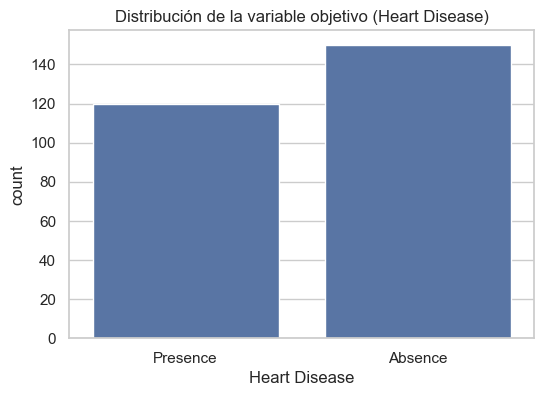

In [4]:
# Información general del dataset
print('\nInformación del dataset:' )
df.info()

# Estadísticas descriptivas
print('\nEstadísticas descriptivas:')
display(df.describe(include='all').T)

# Verificar valores nulos
print('\nValores nulos por columna:')
print(df.isnull().sum())

# Distribución de la variable objetivo
print('\nDistribución de la variable objetivo (Heart Disease):')
print(df['Heart Disease'].value_counts())

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Heart Disease')
plt.title('Distribución de la variable objetivo (Heart Disease)')
plt.show()

## 3. Preprocesamiento de los Datos

In [5]:
# Binarizar la columna objetivo (Heart Disease)
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Seleccionar características relevantes
selected_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[selected_features].copy()
y = df['Heart Disease'].copy()

# Normalizar las características numéricas
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%) de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, stratify=y, random_state=42
)

# Convertir arreglos a DataFrames (opcional para inspección)
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (189, 6)
X_test shape: (81, 6)


## 4. Resumen de los Datos

In [6]:
# Resumen de los datos
print('\nResumen de los datos:')
print(f'Total de muestras: {len(df)}')
print('Distribución de clases (Heart Disease):')
print(y.value_counts(normalize=True))
print(f'Características seleccionadas: {selected_features}')
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
print(f'Tamaño del conjunto de prueba: {len(X_test)}')


Resumen de los datos:
Total de muestras: 270
Distribución de clases (Heart Disease):
Heart Disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64
Características seleccionadas: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
Tamaño del conjunto de entrenamiento: 189
Tamaño del conjunto de prueba: 81
